# Task1 - Intensity Level Reduction

In [1]:
# Importing necessary libraries
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Create the results directory
output_folder = 'results'
os.makedirs(output_folder, exist_ok=True)

In [2]:
# Reduces the number of intensity levels in a grayscale image 
def reduce_intensity_levels(image, levels):
    # handling invalid levels input
    if levels <= 0 or levels > 256 or (levels & (levels - 1)) != 0:
        raise ValueError("Invalid number of levels. It must be a power of 2 between 1 and 256.")
    factor = 256 // levels
    reduced_image = (image // factor) * factor
    
    return reduced_image

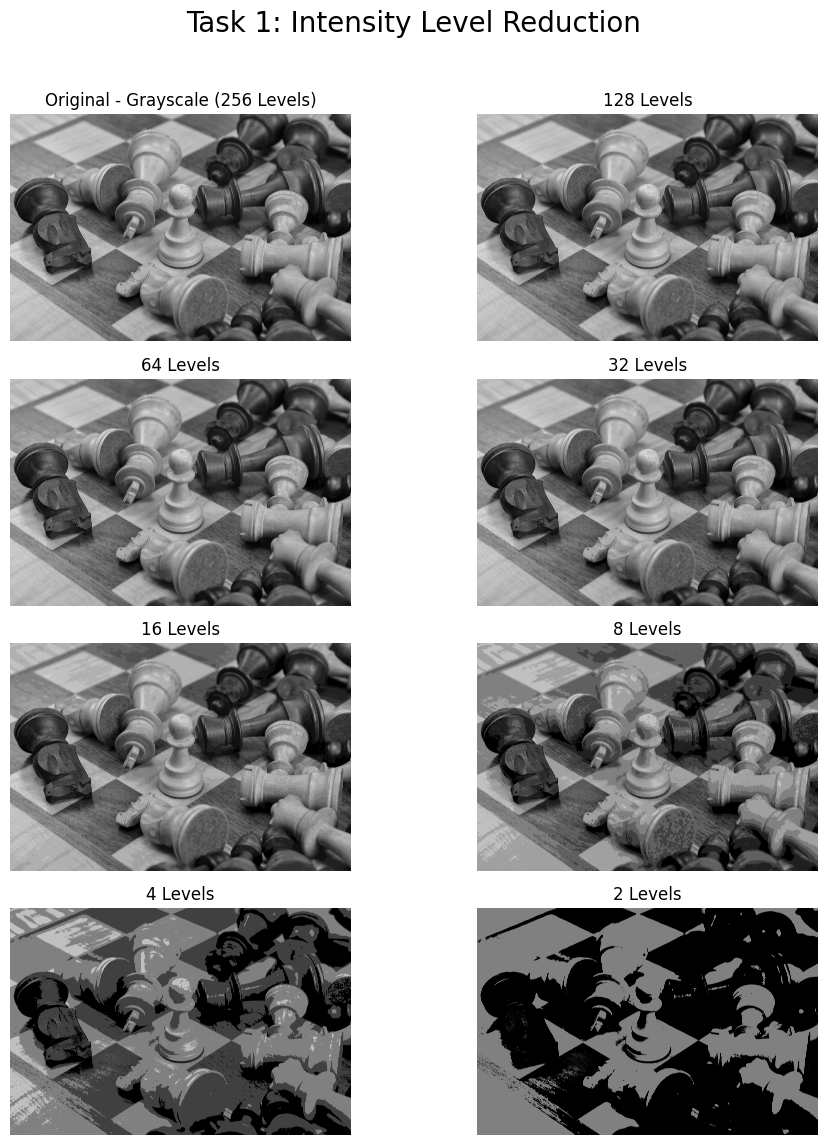

In [ ]:
input_folder = 'images'
input_image_name = 'chess_pieces.jpg'
img_path = os.path.join(input_folder, input_image_name)
original_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

levels_to_test = [128, 64, 32, 16, 8, 4, 2]
processed_images = [original_img]
image_titles = ['Original - Grayscale (256 Levels)']

for k in levels_to_test:
    reduced_img = reduce_intensity_levels(original_img, k)
    processed_images.append(reduced_img)
    image_titles.append(f'{k} Levels')
    output_path = os.path.join(output_folder, f"task1_reduced_{k}_levels.png")
    cv2.imwrite(output_path, reduced_img)

# Display the result
plt.figure(figsize=(10, 12))
plt.suptitle("Task 1: Intensity Level Reduction", fontsize=20, y=0.95)
for i, (img, title) in enumerate(zip(processed_images, image_titles)):
    plt.subplot(4, 2, i + 1) 
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title(title)
    plt.axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

# Task 2 - Spatial Averaging

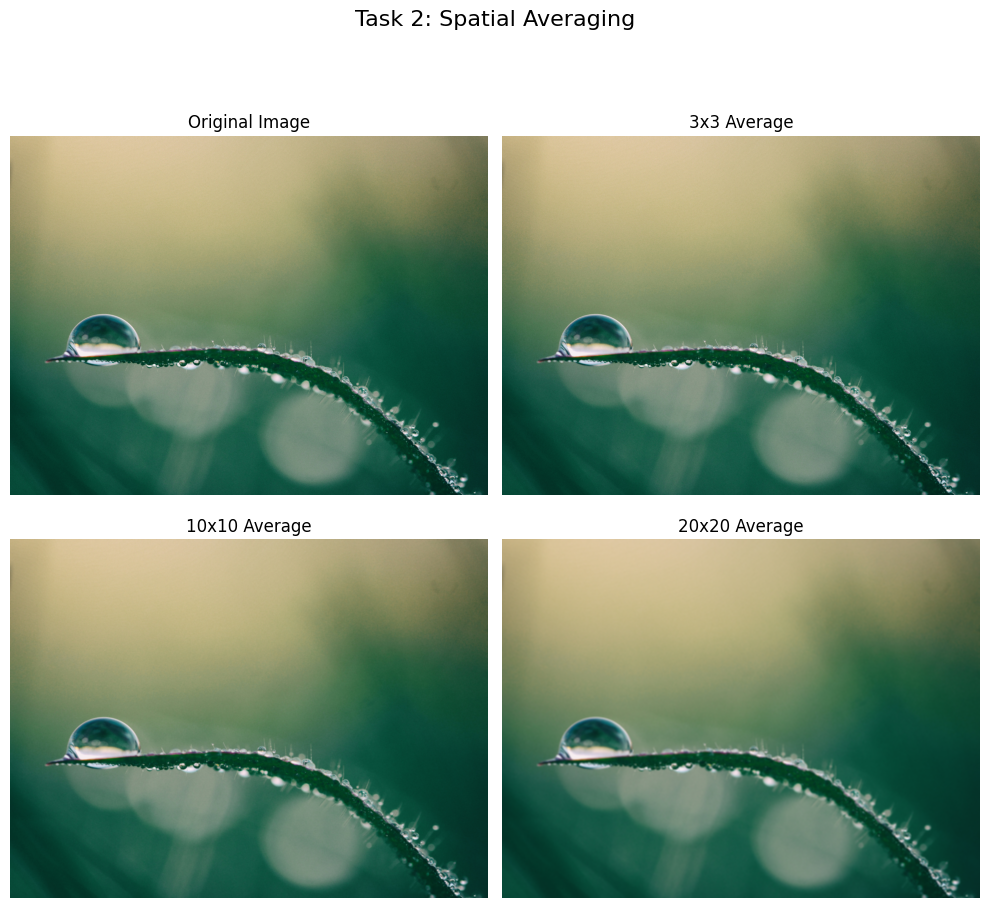

In [18]:
kernel_sizes = [3, 10, 20]
processed_images = []
image_titles = []

input_image_name = 'water_drop.jpg'
img_path = os.path.join(input_folder, input_image_name)
original_img = cv2.imread(img_path)
processed_images.append(original_img)
image_titles.append('Original Image')

for k_size in kernel_sizes:
    blurred_image = cv2.blur(original_img, (k_size, k_size))
    processed_images.append(blurred_image)
    image_titles.append(f'{k_size}x{k_size} Average')

    output_path = os.path.join(output_folder, f"task2_spatial_average_{k_size}x{k_size}.png")
    cv2.imwrite(output_path, blurred_image)

# Display the results
num_images = len(processed_images)
plt.figure(figsize=(10, 10)) 
plt.suptitle("Task 2: Spatial Averaging", fontsize=16)

for i, (img, title) in enumerate(zip(processed_images, image_titles)):
    plt.subplot(2, 2, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Task 3 - Image Rotation

In [6]:
def rotate_image(image, angle):
    if angle == 90:
        return cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

    # For 45 degrees
    (h, w) = image.shape[:2]
    (center_x, center_y) = (w // 2, h // 2)

    M = cv2.getRotationMatrix2D((center_x, center_y), -angle, 1.0)

    # Calculate the new image dimensions to fit the rotated image
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    new_w = int((h * sin) + (w * cos))
    new_h = int((h * cos) + (w * sin))
    # Adjust the translation to center the image
    M[0, 2] += (new_w / 2) - center_x
    M[1, 2] += (new_h / 2) - center_y

    return cv2.warpAffine(image, M, (new_w, new_h))


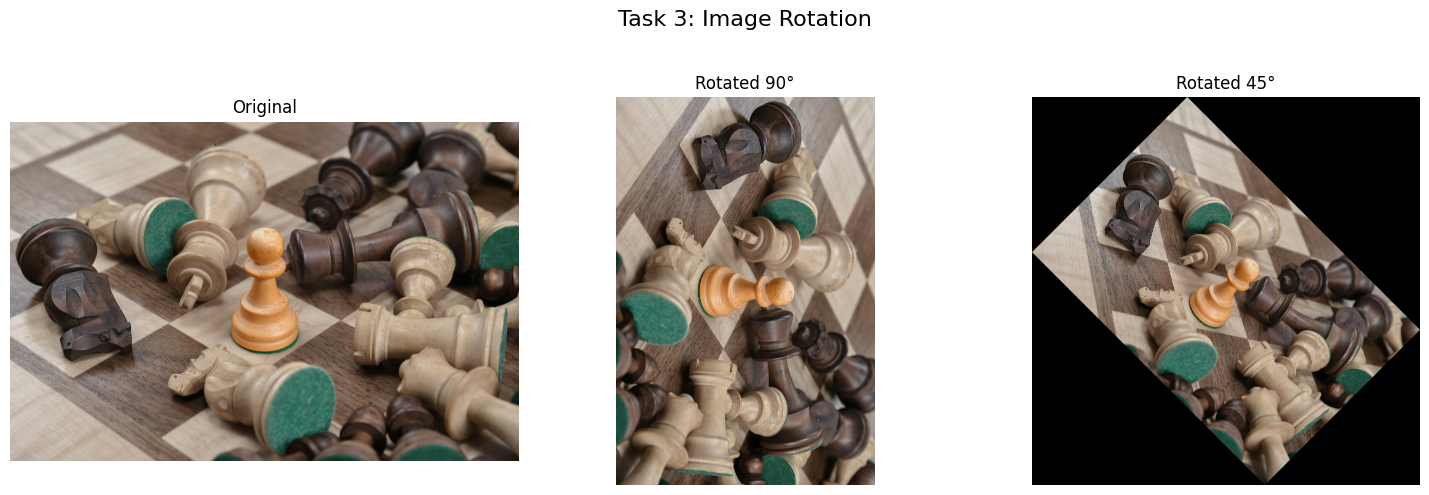

In [7]:
input_folder = 'images'
image_name = 'chess_pieces.jpg'
img_path = os.path.join(input_folder, image_name)

result_dir = 'results'
os.makedirs(result_dir, exist_ok=True)
original_img = cv2.imread(img_path)

img_90_deg = rotate_image(original_img, 90)
img_45_deg = rotate_image(original_img, 45)

# Save the results
path_90_deg = os.path.join(result_dir, "task3_rotated_90_deg.png")
path_45_deg = os.path.join(result_dir, "task3_rotated_45_deg.png")
cv2.imwrite(path_90_deg, img_90_deg)
cv2.imwrite(path_45_deg, img_45_deg)

# Display the results
titles = ['Original', 'Rotated 90°', 'Rotated 45°']
images = [original_img, img_90_deg, img_45_deg]
plt.figure(figsize=(15, 5))
plt.suptitle("Task 3: Image Rotation", fontsize=16)
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Task 4 - Spatial Resolution Reduction

In [8]:
def apply_block_average(image, block_size):
    (h, w, channels) = image.shape
    result_image = image.copy()

    for y in range(0, h, block_size):
        for x in range(0, w, block_size):
            y_end = min(y + block_size, h)
            x_end = min(x + block_size, w)
            current_block = image[y:y_end, x:x_end]
            average_color = np.mean(current_block, axis=(0, 1)).astype(np.uint8)
            result_image[y:y_end, x:x_end] = average_color
            
    return result_image

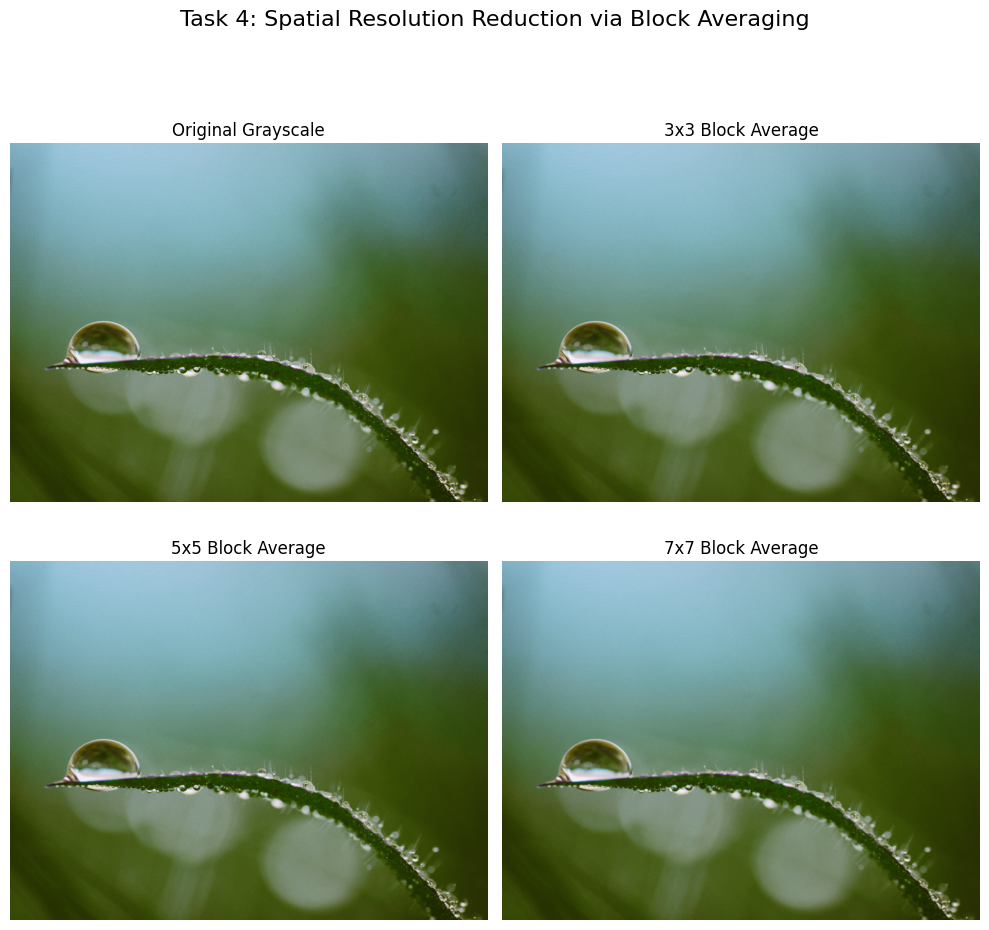

In [9]:
input_folder = 'images'
image_name = 'water_drop.jpg'
img_path = os.path.join(input_folder, image_name)

result_dir = 'results'
os.makedirs(result_dir, exist_ok=True)
original_img = cv2.imread(img_path)

img_3x3 = apply_block_average(original_img, 3)
img_5x5 = apply_block_average(original_img, 5)
img_7x7 = apply_block_average(original_img, 7)

# Save the results
path_3x3 = os.path.join(result_dir, "task4_block_avg_3x3.png")
path_5x5 = os.path.join(result_dir, "task4_block_avg_5x5.png")
path_7x7 = os.path.join(result_dir, "task4_block_avg_7x7.png")
cv2.imwrite(path_3x3, img_3x3)
cv2.imwrite(path_5x5, img_5x5)
cv2.imwrite(path_7x7, img_7x7)

# Display the results
titles = ['Original Grayscale', '3x3 Block Average', '5x5 Block Average', '7x7 Block Average']
images = [original_img, img_3x3, img_5x5, img_7x7]
plt.figure(figsize=(10, 10))
plt.suptitle("Task 4: Spatial Resolution Reduction via Block Averaging", fontsize=16)
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()